# TimeSeries Forecasting Average Monthly Wage

Imports:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":1.2})
sns.set_style("whitegrid")
custom_style = {'grid.color':'0.8', 'grid.linestyle':'--', 'grid.linewidth':0.5}
sns.set_style(custom_style)

Load Datasets:

In [4]:
df = pd.read_csv('WageSeriesData.csv', index_col='Date', parse_dates=True)

In [5]:
df_inf = pd.read_csv('Inflation.csv', index_col='Year')

In [6]:
df.index.freq='M'
df.index

DatetimeIndex(['1968-01-31', '1968-02-29', '1968-03-31', '1968-04-30',
               '1968-05-31', '1968-06-30', '1968-07-31', '1968-08-31',
               '1968-09-30', '1968-10-31',
               ...
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30'],
              dtype='datetime64[ns]', name='Date', length=633, freq='M')

In [7]:
df.head()

,Private (nominal),Public (nominal),Private Sector,Public Sector
Date,,,,
1968-01-31,0.056282,0.060545,4143.332741,4457.226191
1968-02-29,0.055318,0.059833,4075.754491,4408.462032
1968-03-31,0.057530,0.060647,4207.177942,4435.149646
1968-04-30,0.057777,0.060749,4187.152114,4402.502214
1968-05-31,0.057542,0.060952,4176.933437,4424.510215


In [8]:
df_inf.head()

,Inflation Rate,GDP per capita growth (annual %),GDP per capita (constant LCU)
Year,,,
1953,0.1910,NaN,NaN
1954,0.0755,NaN,NaN
1955,0.0482,NaN,NaN
1956,0.0460,NaN,NaN
1957,0.0520,NaN,NaN


In [9]:
df['Year'] = df.index.year

In [10]:
df_inf = df_inf.loc[1968:]

### EDA:

Seasonality in Public Sector:

In [11]:
analysis = df.drop(['Private (nominal)', 'Public (nominal)', 'Private Sector'], axis=1)

In [12]:
analysis['Year'] = df.index.year
analysis['Month'] = df.index.month

In [13]:
analysis = analysis.pivot("Month", "Year", "Public Sector")

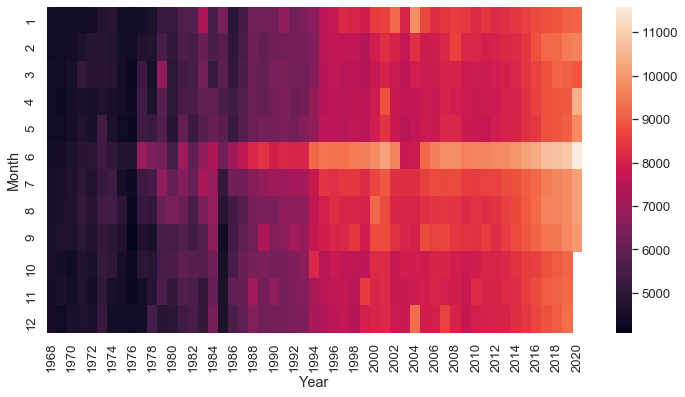

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(analysis);

In [15]:
# df_inf['Cumulative Inf'] = (df_inf['Inflation Rate'] + 1).cumprod()
# df_inf['Cumulative GDP'] = ((df_inf['GDP per capita growth (annual %)'] / 100) + 1).cumprod()

In [16]:
df = pd.merge(left=df.reset_index(), right=df_inf, how='left', on='Year')
df.set_index('Date', inplace=True)
df.drop('Year', axis=1, inplace=True)
df.head()

,Private (nominal),Public (nominal),Private Sector,Public Sector,Inflation Rate,GDP per capita growth (annual %),GDP per capita (constant LCU)
Date,,,,,,,
1968-01-31,0.056282,0.060545,4143.332741,4457.226191,0.0193,13.836665,53239.67097
1968-02-29,0.055318,0.059833,4075.754491,4408.462032,0.0193,13.836665,53239.67097
1968-03-31,0.057530,0.060647,4207.177942,4435.149646,0.0193,13.836665,53239.67097
1968-04-30,0.057777,0.060749,4187.152114,4402.502214,0.0193,13.836665,53239.67097
1968-05-31,0.057542,0.060952,4176.933437,4424.510215,0.0193,13.836665,53239.67097


In [17]:
# df['Inflation Rate'] = df['Inflation Rate'].shift(12)
# df['Cumulative Inf'] = df['Cumulative Inf'].shift(12)

In [18]:
# df['Private Base'] = df['Private (nominal)'] / df['Cumulative Inf']
# df['Public Base'] = df['Public (nominal)'] / df['Cumulative Inf']
# df['Private Base'] = df['Private Base'].fillna(df['Private (nominal)'])
# df['Public Base'] = df['Public Base'].fillna(df['Public (nominal)'])

In [19]:
# df['Private Sector'] = df['Private Base'] * df['Cumulative Inf'][-1]
# df['Public Sector'] = df['Public Base'] * df['Cumulative Inf'][-1]

In [20]:
df['GDP per capita'] = df['GDP per capita (constant LCU)']/12
df['GDP per capita'] = df['GDP per capita'].rolling(window=6).mean()

In [21]:
df.head()

,Private (nominal),Public (nominal),Private Sector,Public Sector,Inflation Rate,GDP per capita growth (annual %),GDP per capita (constant LCU),GDP per capita
Date,,,,,,,,
1968-01-31,0.056282,0.060545,4143.332741,4457.226191,0.0193,13.836665,53239.67097,NaN
1968-02-29,0.055318,0.059833,4075.754491,4408.462032,0.0193,13.836665,53239.67097,NaN
1968-03-31,0.057530,0.060647,4207.177942,4435.149646,0.0193,13.836665,53239.67097,NaN
1968-04-30,0.057777,0.060749,4187.152114,4402.502214,0.0193,13.836665,53239.67097,NaN
1968-05-31,0.057542,0.060952,4176.933437,4424.510215,0.0193,13.836665,53239.67097,NaN


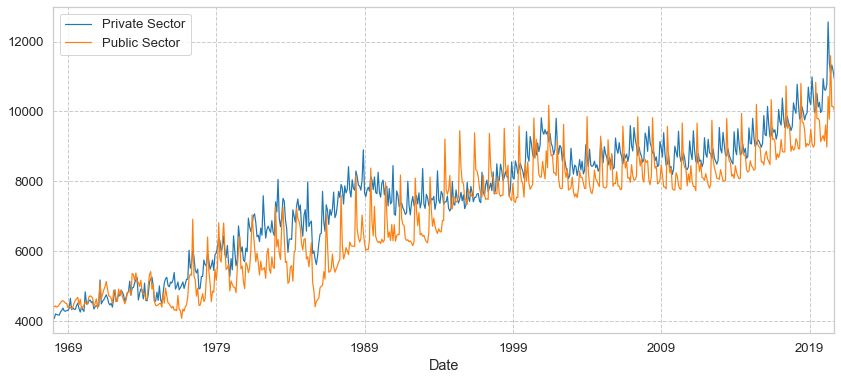

In [22]:
df[['Private Sector', 'Public Sector']].plot(figsize=(14,6));

### SMA, SES, TES:

In [23]:
df['Private SMA12'] = df['Private Sector'].rolling(window=12).mean()
df['Public SMA12'] = df['Public Sector'].rolling(window=12).mean()

df['Private SES12'] = df['Private Sector'].ewm(span=12).mean()
df['Public SES12'] = df['Public Sector'].ewm(span=12).mean()

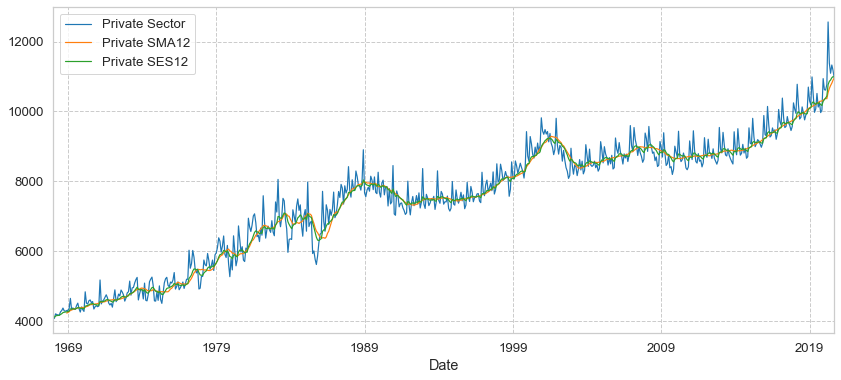

In [24]:
df[['Private Sector','Private SMA12','Private SES12']].plot(figsize=(14,6));

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

TES = ExponentialSmoothing(df['Private Sector'], trend='mul', seasonal='mul', seasonal_periods=12, freq='M')
TES = TES.fit()
df['Private TES12 (mul)'] = TES.fittedvalues

TES = ExponentialSmoothing(df['Public Sector'], trend='mul', seasonal='mul', seasonal_periods=12, freq='M')
TES = TES.fit()
df['Public TES12 (mul)'] = TES.fittedvalues

C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


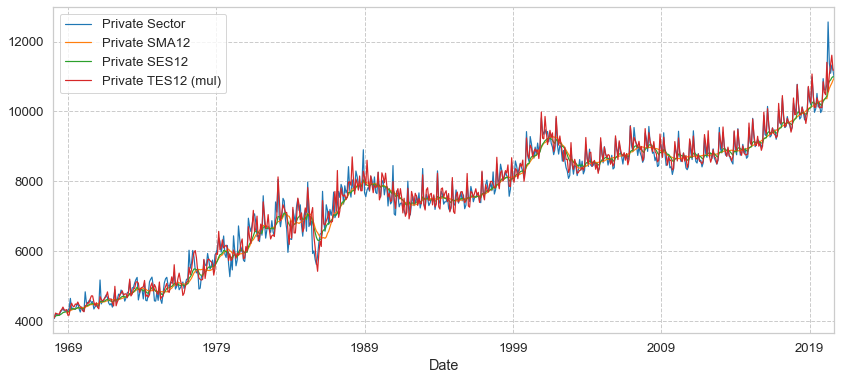

In [26]:
df[['Private Sector','Private SMA12','Private SES12','Private TES12 (mul)']].plot(figsize=(14,6));

### Private Sector:

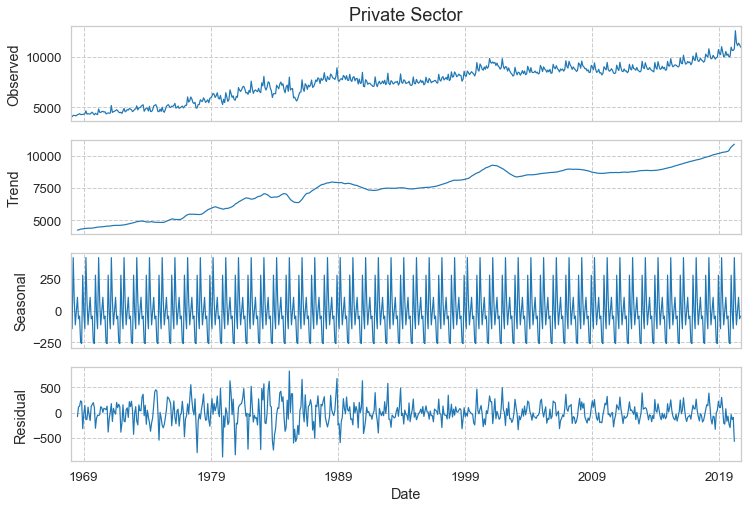

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Private Sector'], model='additive')

fig, axes = plt.subplots(4, 1, sharex=True)
fig.set_size_inches(12,8) 
axes[0].set_title('Private Sector', fontsize=18)

decompose.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decompose.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decompose.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decompose.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual');

Statsmodels Forecast

In [28]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs

def stationarity_analyzer(data, n_diff, diff=None, n_seasonality=None, figsize=None):
    '''
    Description
    ==================================================
    Efficient procedure to choose the (p,d,q) and (P,D,Q) parameters, including guidance.


    Inputs
    ==================================================
    data: data input, in pandas DataFrame or Series format.
    n_diff: how many steps of differencing will be done.
    diff: define the optimal n_diff, if None, it will be decided by pmdarima ndiffs function.
    n_seasonality: define the lag for each difference, for seasonal differencing (after how many seasons the cycle ends).
    figsize: adjust the plots width and height.


    Guidance
    ==================================================
    A) Dealing with ARIMA models:

        "I" component (d):
        The right order of differencing is the minimum differencing required to get a near-stationary series.
        If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing.
        On the other hand, if the lag 1 (numbered 1 on the plot) autocorrelation is too negative, then the series is probably over-differenced.

        "AR" component (p):
        Choose the first line in the PACF plot who is significant (above the significance line), exclude the zero line (the first on the plot).

        "MA" component (q):
        Choose the first line in the ACF plot who is significant (above the significance line), exclude the zero line (the first on the plot).


    B) Dealing with SARIMA models:
        1) Follow the same procedure as for ARIMA model to choose the (p,d,q) parameters.

        2) Then, if the time series has seasonality, run the same procedure again to choose (P,D,Q) parameters.
        But this time, enter the currect number of seasons (n_seasons parameter) to define the seasonality.
        e.g.: monthly(12), quarterly (3), etc (if the series index has monthly frequency).
        Then, use it as the forth paramter for SARIMA: (P,D,Q)[S], when the S parameter stands for the n_seasonality value.

    C) Final adjustments:
        *** If the series is slightly under-differenced, try to add one or more "AR" terms.
        *** Likewise, if the series is slightly over-differenced, try to add one or more "MA" terms.


    Created by Roei Arpaly, 2021. linkedin.com/in/roei-arpaly.
    '''

    if figsize == None:
        figsize = (14, 8+n_diff*3)
    
    if n_seasonality == None:
        n_seasonality = 1

    if (type(data) is not pd.DataFrame) and (type(data) is not pd.Series):
        raise ValueError("INSERT PANDAS DATAFRAME / SERIES")



    fig, axes = plt.subplots(n_diff+2, 2, figsize=figsize)
    order_dict = {1:'st', 2:'nd', 3:'rd'}
    df = data


    ## "I" component (d):

    for i in range(n_diff+1):
        hp_cycle, hp_trend = sm.tsa.filters.hpfilter(df)
        test = adfuller(df.dropna().values)
        title = f'{str(i)}th Order Differencing (n_seasonality: {n_seasonality})\nAugmented Dickey Fuller test:\nP-Value: {round(test[1], 2)}, Statistic: {round(test[0], 2)}'
        pacf_title = f'{str(i)}th Order Differencing Autocorrelation'

        if i == 0: # Original Series
            title = f'Original Series\nAugmented Dickey Fuller test:\nP-Value: {round(test[1], 2)}, Statistic: {round(test[0], 2)}'
            pacf_title = 'Original Autocorrelation'
            axes[i, 0].plot(hp_trend.values, color='blue', label='Trend', zorder=3)

        if 0 < i < 3:
            title = f'{str(i)+order_dict[i]} Order Differencing (n_seasonality: {n_seasonality})\nAugmented Dickey Fuller test:\nP-Value: {round(test[1], 2)}, Statistic: {round(test[0], 2)}'
            pacf_title = f'{str(i)+order_dict[i]} Order Differencing Autocorrelation'

        axes[i, 0].plot(df.values, zorder=0)
        axes[i, 0].set_title(title)
        axes[i, 0].hlines(df.mean(), 0, len(df), colors='red', label='Mean', zorder=1)
        axes[i, 0].hlines(df.median(), 0, len(df), colors='k', linestyle='--', label='Median', zorder=2)
        plot_acf(df.diff().dropna().values, ax=axes[i, 1], title=pacf_title)
        
        axes[i, 0].legend(loc=1, prop={'size': 10})
        
        df = df.diff(n_seasonality)

    ## "AR" component (p):

    if diff == None:
        diff = ndiffs(data, test='adf')

    for j in range(diff):
        data = data.diff(n_seasonality)
        
    plot_pacf(data.dropna().values, ax=axes[i+1, 0], title=f"PACF - Partial Autocorrelation of {diff} differencing (choose p)");
    axes[i+1, 0].set(ylim=(0, None))


    ## "MA" component (q):

    plot_acf(data.dropna().values, ax=axes[i+1, 1], title=f"ACF - Autocorrelation of {diff} differencing (choose q)");
    axes[i+1, 1].set(ylim=(0, None))

    plt.tight_layout();

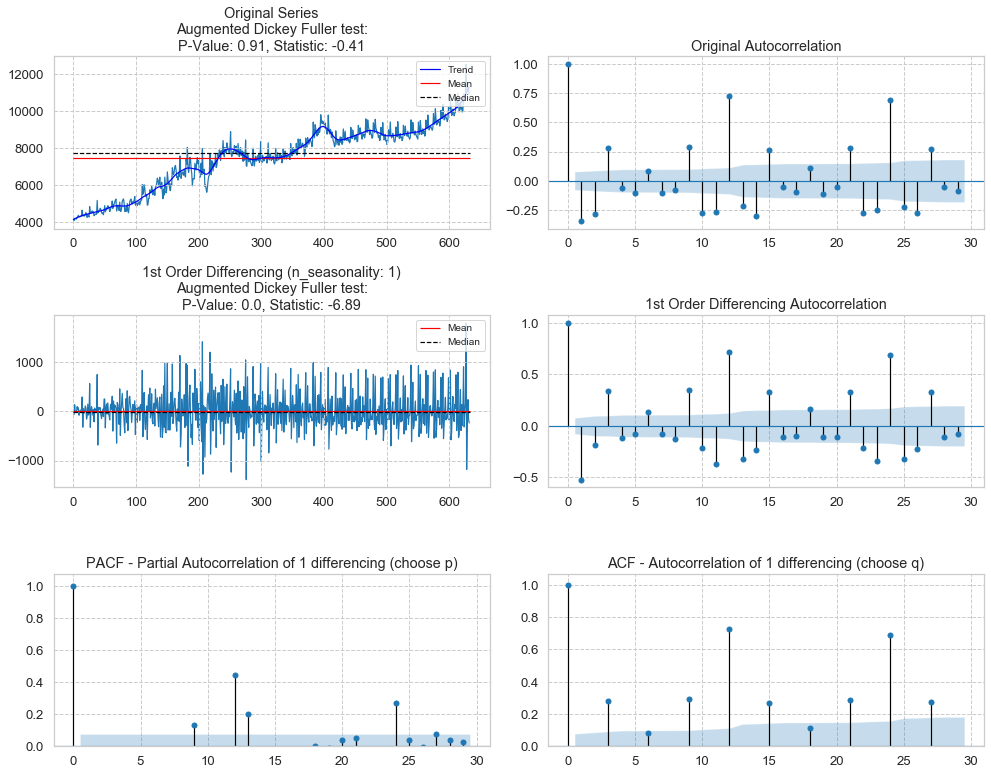

In [29]:
stationarity_analyzer(df['Private Sector'], n_diff=1)

Evaluation (Predict):

In [30]:
train = df['Private Sector'][:-12]
test = df['Private Sector'][-12:]

plot_train_range = train[-12:].append(test[:1])

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from fbprophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import pmdarima as pm


def timeseries_analyzer(train, test, orders, seasonal_orders):

    n_periods = len(test)
    auto_model = pm.auto_arima(train, seasonal=True, m=12, error_action="ignore", trace=False)

    models = [
            ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, initialization_method='estimated', freq='M'),
            ETSModel(train, error='add', trend=None, seasonal='mul', seasonal_periods=12, initialization_method='estimated', freq='M'),
            Prophet(weekly_seasonality=False, daily_seasonality=False),
            SARIMAX(train, order=auto_model.order, seasonal_order=auto_model.seasonal_order, freq='M'),
            SARIMAX(train, order=orders, seasonal_order=seasonal_orders, freq='M') # Hand picked by analyzing the stationarity with the "stationarity_analyzer".
            ]

    fig, axes = plt.subplots(len(models), 1, figsize=(12,18))

    pmdarima_orders = True
    counter = 0
    for model in models:
        title = ''

        if type(model) is Prophet:
            df_prop = pd.DataFrame({'ds':train.index, 'y':train.values})
            model.fit(df_prop)
            future = model.make_future_dataframe(periods=n_periods, freq='M')
            summary = model.predict(future).set_index('ds')[-12:]
            fcast = summary['yhat']
            lower_bound = summary['yhat_lower']
            upper_bound = summary['yhat_upper']

        elif type(model) is SARIMAX:
            fitted_model = model.fit(maxiter=200, disp=False)

            if pmdarima_orders == True:
                title = ' - pmdarima orders'
            pmdarima_orders = False

            summary = fitted_model.get_forecast(n_periods).summary_frame(alpha=0.05) # 95% confidence
            fcast = summary['mean']
            lower_bound = summary['mean_ci_lower']
            upper_bound = summary['mean_ci_upper']

        else:
            anchor = None
            if type(model) is ETSModel:
                anchor = 'end'
                # summary = fitted_model.get_prediction(start=fcast.index.min(), end=fcast.index.max()).summary_frame(alpha=0.05) # summary (for ETS only).

            fitted_model = model.fit()
            fcast = fitted_model.forecast(n_periods)

            simulations = fitted_model.simulate(n_periods, repetitions=100, anchor=anchor) # Instead of confidence interval.
            # Convert to lower and upper bound with: lower_bound = simulations.transpose().quantile(0.95)
            #                                        upper_bound = simulations.transpose().quantile(0.05)
            axes[counter].plot(simulations, alpha=0.05, color='grey', zorder=0)

        axes[counter].plot(plot_train_range, label='Private Sector Wage', color='k')
        axes[counter].plot(fcast, label='Forecast', color='tab:red', linestyle='--', zorder=1)
        axes[counter].plot(test, label='Actual (test)', color='white', marker='o', markeredgecolor='k', markersize=8, linestyle='None', alpha=0.75)
        axes[counter].set_title(f'{model.__class__.__name__+title}\nRMSE: {round(np.sqrt(mean_squared_error(test, fcast)))} NIS')
        axes[counter].set_xlim(plot_train_range.index.min(), fcast.index.max())


        if type(model) in [Prophet, SARIMAX]:
            axes[counter].fill_between(fcast.index, upper_bound, lower_bound, alpha=0.2, linewidth=1, edgecolor='k', color='tab:grey')

        axes[counter].legend(loc=2, ncol=3)
        counter += 1

    plt.tight_layout()

C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


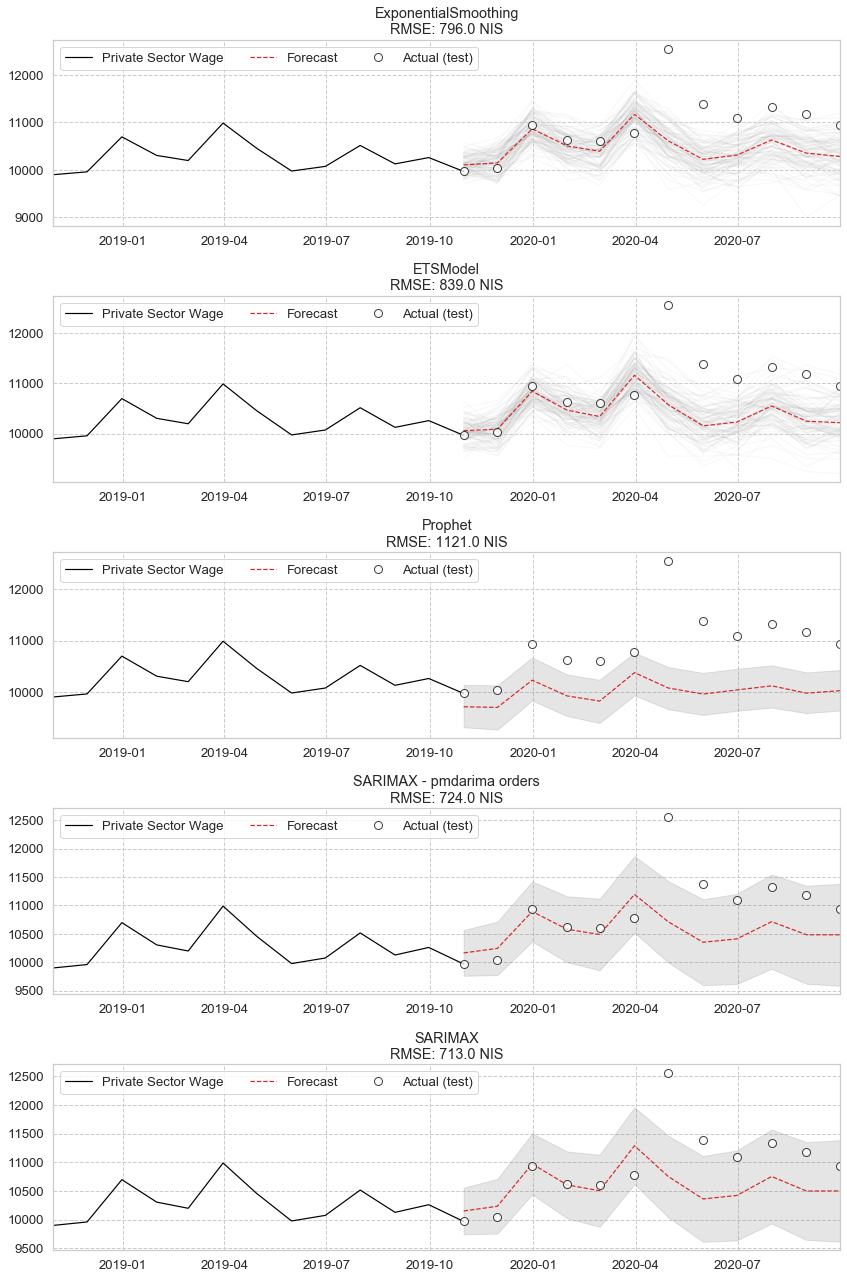

In [32]:
timeseries_analyzer(train, test, (1,1,1), (1,1,1,12))

Forecast:

In [33]:
model = SARIMAX(df['Private Sector'], order=(1,1,1), seasonal_order=(1,1,1,12), freq='M')
fitted_model = model.fit(maxiter=200)
fcast = fitted_model.forecast(24).rename(f'SARIMA(1,1,1)(1,1,1,12) Forecast')

private_forecast = fitted_model.get_forecast(24).summary_frame()

# start = df.index[-1] + pd.DateOffset(months=1)
# end = df.index[-1] + pd.DateOffset(months=24)
# fcast = fitted_model.predict(start=start, end=end, typ='levels').rename(f'SARIMA{auto_model.order}{auto_model.seasonal_order} Forecast')

C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


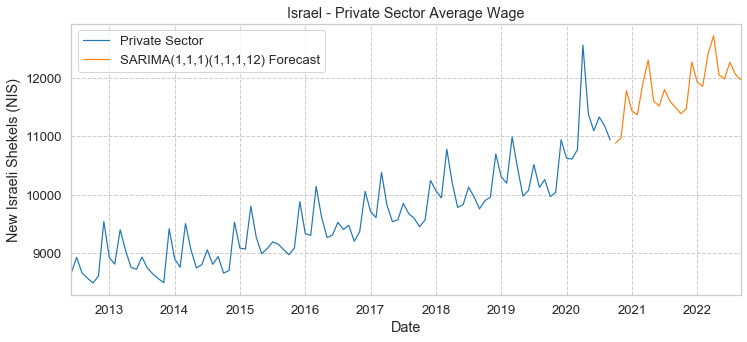

In [34]:
df['Private Sector'][-100:].plot(figsize=(12,5), title='Israel - Private Sector Average Wage', legend=True)
fcast.plot(legend=True)
plt.ylabel('New Israeli Shekels (NIS)');

### Public Sector:

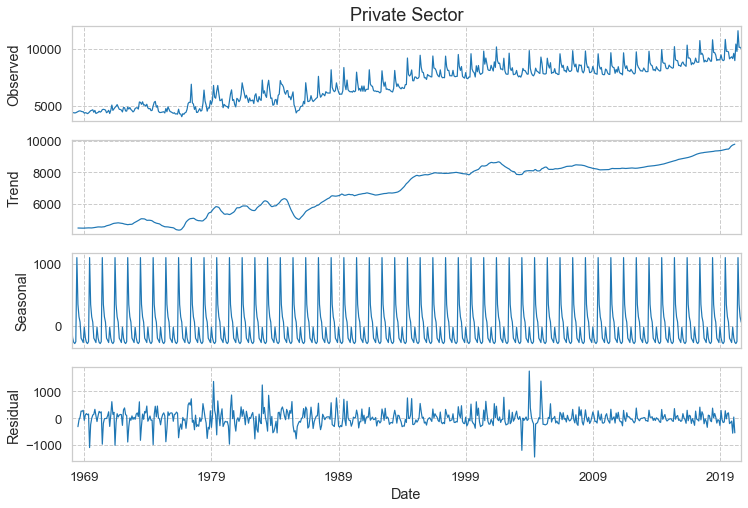

In [35]:
decompose = seasonal_decompose(df['Public Sector'], model='additive')

fig, axes = plt.subplots(4, 1, sharex=True)
fig.set_size_inches(12,8) 
axes[0].set_title('Private Sector', fontsize=18)

decompose.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decompose.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decompose.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decompose.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual');

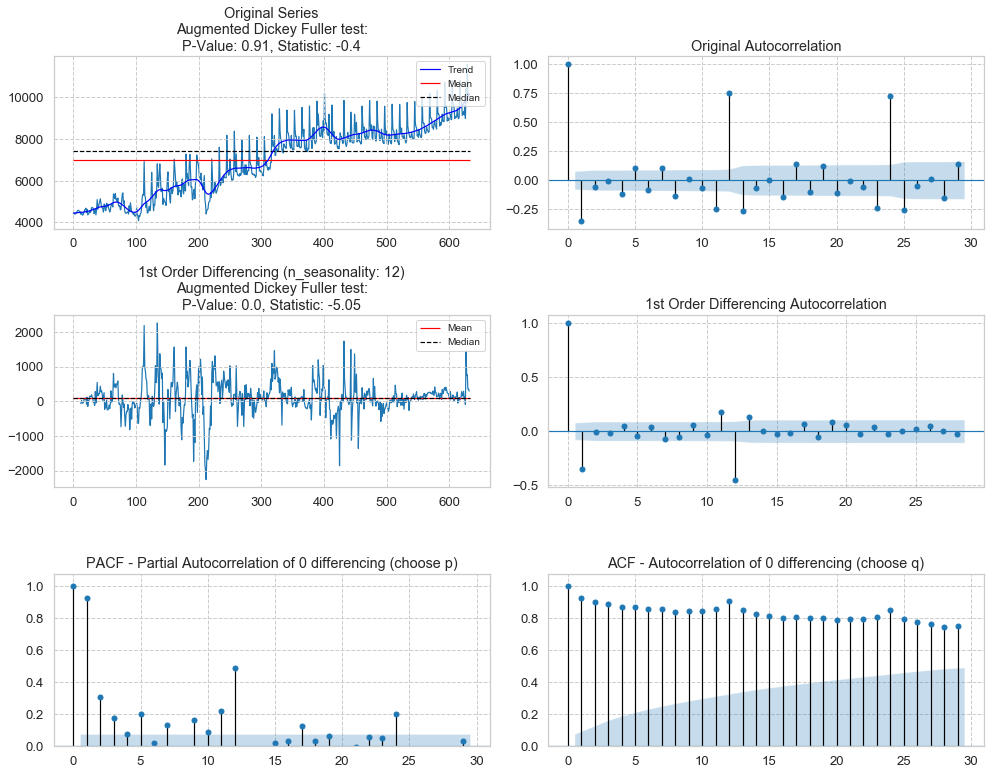

In [36]:
stationarity_analyzer(df['Public Sector'], n_diff=1, n_seasonality=12)

Evaluation (Predict):

In [37]:
train = df['Public Sector'][:-12]
test = df['Public Sector'][-12:]

plot_train_range = train[-12:].append(test[:1])

C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


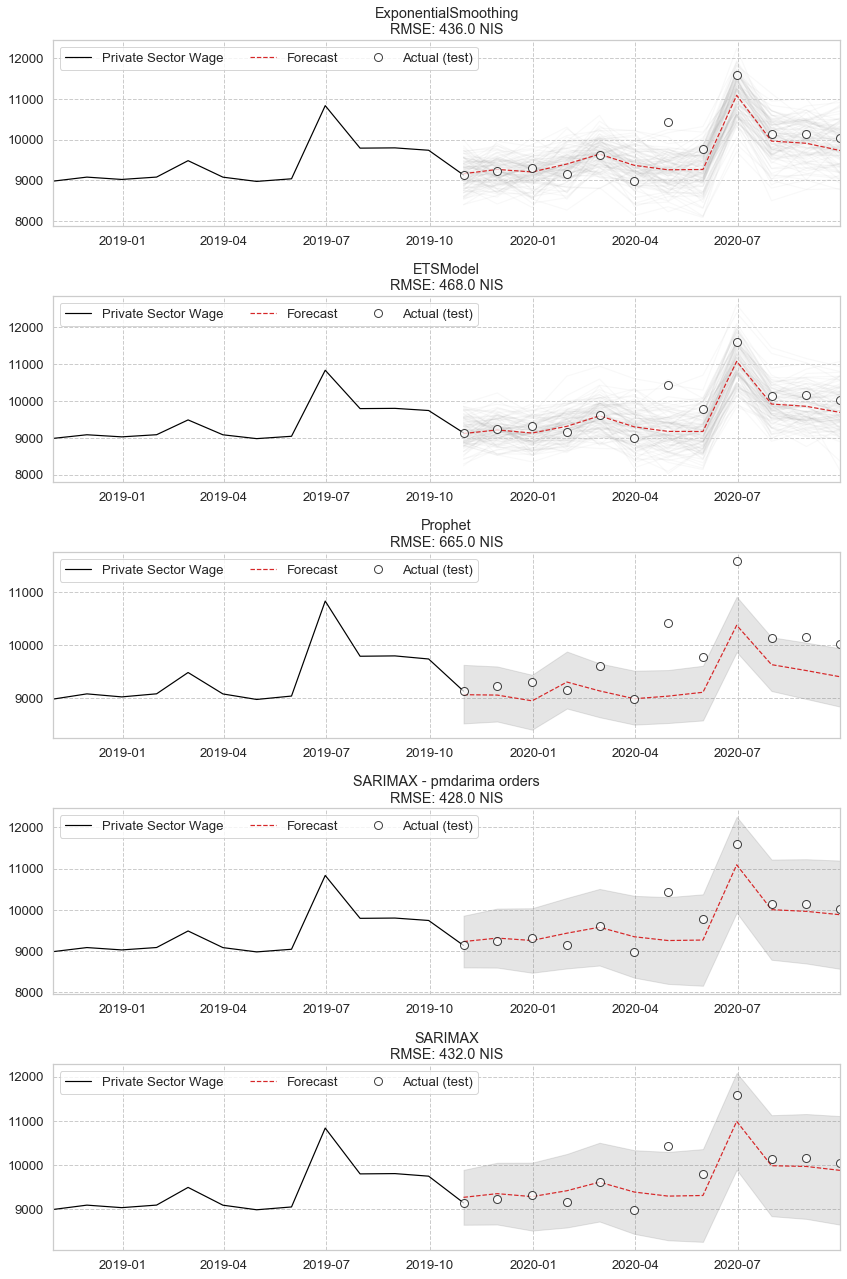

In [38]:
timeseries_analyzer(train, test, (1,0,1), (1,0,1,12))

Forecast:

In [39]:
model = SARIMAX(df['Public Sector'], order=(1,0,1), seasonal_order=(1,0,1,12), freq='M')
fitted_model = model.fit(maxiter=200)
fcast = fitted_model.forecast(24).rename(f'SARIMA(1,0,1)(1,0,1,12) Forecast')

pub_forecast = fitted_model.get_forecast(24).summary_frame()

# start = df.index[-1] + pd.DateOffset(months=1)
# end = df.index[-1] + pd.DateOffset(months=24)
# fcast = fitted_model.predict(start=start, end=end, typ='levels').rename(f'SARIMA{auto_model.order}{auto_model.seasonal_order} Forecast')

C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ronis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


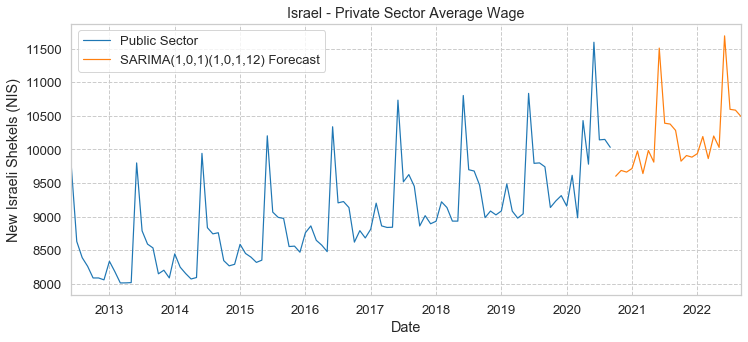

In [40]:
df['Public Sector'][-100:].plot(figsize=(12,5), title='Israel - Private Sector Average Wage', legend=True)
fcast.plot(legend=True)
plt.ylabel('New Israeli Shekels (NIS)');

## Appending the forecasts:

In [41]:
private_forecast.index.rename('Date', inplace=True)
private_forecast.columns = ['Private Forecast','mean_se','Private Lower','Private Upper']
private_forecast.drop('mean_se', axis=1, inplace=True)

df = df.append(private_forecast)

In [42]:
last_idx = df['Private Sector'].last_valid_index()
last_private_value = df['Private Sector'][[last_idx]]

df['Private Forecast'][last_idx] = last_private_value
df['Private Lower'][last_idx] = last_private_value
df['Private Upper'][last_idx] = last_private_value


last_public_value = df['Public Sector'][[last_idx]]

df['Public Forecast'] = pub_forecast['mean']
df['Public Lower'] = pub_forecast['mean_ci_lower']
df['Public Upper'] = pub_forecast['mean_ci_upper']

df['Public Forecast'][last_idx] = last_public_value
df['Public Lower'][last_idx] = last_public_value
df['Public Upper'][last_idx] = last_public_value

### Plotting:

In [43]:
df = df.reset_index()

df_columns = ['Date','Private (nominal)','Public (nominal)','Private Sector','Public Sector','GDP per capita',
              'Private Forecast','Private Lower','Private Upper','Public Forecast','Public Lower','Public Upper']

Moving labels:

In [44]:
def legend_heights(df):
    heights = {}
    num_columns = len(df.columns[1:])
    max_value, min_value = df.iloc[-1,1:].max(), df.iloc[-1,1:].min()
    min_distance = (max_value-min_value)/(num_columns/1) # length/2 will result in x2 more space.

    for column in df.columns[1:]:
        heights[column] = df[column][df[column].last_valid_index()] - max_value*0.005
        if np.isnan(heights[column]):
            heights[column] = 0

    def adjust_heights():
        for column1, value1 in heights.items():
            for column2, value2 in heights.items():
                if column1 != column2:
                    distance = abs(value1-value2)
                    if distance < min_distance:
                        if value1 < value2:
                            heights[column1] -= max_value*0.001
                            heights[column2] += max_value*0.001
                        else:
                            heights[column1] += max_value*0.001
                            heights[column2] -= max_value*0.001
                        return True
    while True:
        adjusted = adjust_heights()
        if not adjusted:
            break

    return heights

Adding multiple features:

In [45]:
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

def plot(df):
    gs = GridSpec(2, 1, height_ratios=[20,1])
    ax1 = plt.subplot(gs[0])
    ax1.set_title('Israel - Monthly Average Wage (real values)', fontsize=18, pad=20)
    ax1.set_ylabel('New Israeli Shekels (NIS)')
    ax1.tick_params(axis="x", labelbottom=False)
    ax1.spines['right'].set_visible(False)

    ax2 = plt.subplot(gs[1], sharex=ax1)
    ax2.set_yticklabels([])
    ax2.grid(b=False)
    ax2.set_xlabel('Source: World Bank and Bank of Israel (BOI).', fontsize=10, color='grey', ha='right')
    ax2.xaxis.set_label_coords(0.165, -2)
    ax2.tick_params(axis="x", pad=0)
    ax2.spines['right'].set_visible(False)

    heights = legend_heights(df[['Date','Private Sector','Public Sector','GDP per capita']])
    heights2 = legend_heights(df[['Date','Private (nominal)','Public (nominal)']])

    colors = {'Private (nominal)':'slategrey','Public (nominal)':'silver','Private Sector':'tab:blue','Public Sector':'lightsteelblue',
              'GDP per capita':'goldenrod','Private Forecast':'tab:blue','Public Forecast':'lightsteelblue'}

            
    for i, (column, height) in enumerate(heights.items()):
        alpha, lw = 1, 1
        offset = pd.DateOffset(months=1)
        if column == 'GDP per capita':
            alpha, lw = 0.25, 6
            if 624 < df.index[-1]:
                offset = pd.DateOffset(months=6)

        ax1.plot(df['Date'], df[column], color=colors[column], alpha=alpha, linewidth=lw)
        if df.index[-1] < 633:
            ax1.text(x=df['Date'][df[column].last_valid_index()]+offset, y=height, s=column, fontsize=12, color=colors[column])

    for i, (column, height) in enumerate(heights2.items()):
        alpha, alpha_t, lw = 0.3, 0.7, 1
        if 480 < df.index[-1]:
            alpha_t = 0
        
        ax1.plot(df['Date'], df[column], color=colors[column], alpha=alpha, linewidth=lw)
        ax1.text(x=df['Date'][df[column].last_valid_index()]+pd.DateOffset(months=1), y=height, s=column, fontsize=10, color=colors[column], alpha=alpha_t)

    if 633 <= df.index[-1]:
        heights3 = legend_heights(df[['Date','Private Forecast','Public Forecast']])
        for i, (column, height) in enumerate(heights3.items()):
            offset = pd.DateOffset(months=1)
            ax1.plot(df['Date'], df[column], color=colors[column], linestyle='--', linewidth=2)
            ax1.plot(df['Date'], df[column], color='k', linestyle='-', linewidth=0.5)
            ax1.text(x=df['Date'][df[column].last_valid_index()]+offset, y=height, s=column, fontsize=12, color=colors[column])
            ax1.text(x=df['Date'][df[column].last_valid_index()]+offset, y=height, s=column, fontsize=12, color='k', alpha=0.5)

        
        ax1.fill_between(df['Date'], df['Private Upper'], df['Private Lower'], alpha=0.1, linewidth=1, edgecolor='k', color='tab:blue')
        ax1.fill_between(df['Date'], df['Public Upper'], df['Public Lower'], alpha=0.1, linewidth=1, edgecolor='k', color='lightsteelblue')
        

    # Additional Info
    min, max = np.floor(round(df.min(numeric_only=True).min()/1000, 2))*1000, np.ceil(round(df.max(numeric_only=True).max()/1000, 2))*1000 + 100
    ax1.set_ylim(min,max)
    ax1.tick_params(axis="y", pad=0)
    ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('₪ {x:,.0f}'))
    ax2.set_ylabel('Currency:', rotation=0, fontsize=10)
    ax2.yaxis.set_label_coords(-0.0325, 0.1)

    max_date, min_date = df['Date'].max(), df['Date'].min()
    start = pd.to_datetime('1968-01-31')
    lira = pd.to_datetime('1980-02-22')
    shekel = pd.to_datetime('1985-09-04')
    newshekel = pd.to_datetime('2023-09-30')
    
    ax2.broken_barh([(mdates.date2num(start), (lira-start).days),
                     (mdates.date2num(lira), (shekel-lira).days),
                     (mdates.date2num(shekel), (newshekel-shekel).days)], (0,1),
                    facecolors=('tan','silver','darkgoldenrod'), alpha=0.3)
    
    ax2.set_xlim(mdates.date2num(min_date),mdates.date2num(max_date))
    
    ax2.text(x=mdates.date2num(lira-(lira-start)/2), y=0.28, s='Israeli Pound (Lira)', ha='center', fontsize=11, weight='bold', clip_on=True)
    ax2.text(x=mdates.date2num(shekel-(shekel-lira)/2), y=0.28, s='Israeli Shekel', ha='center', fontsize=11, weight='bold', clip_on=True)
    ax2.text(x=mdates.date2num(newshekel-(newshekel-shekel)/2), y=0.28, s='Israeli New Shekel', ha='center', fontsize=11, weight='bold', clip_on=True)

    if 633 <= df.index[-1]:
        ax1.vlines(x=pd.to_datetime('2020-09-30'), ymin=min, ymax=max, color='black', linestyle=(0, (5, 3)), linewidth=1)

    if (max_date - min_date)/np.timedelta64(1,'M') <= 200:
        ax2.xaxis.set_major_locator(mdates.YearLocator(1))
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

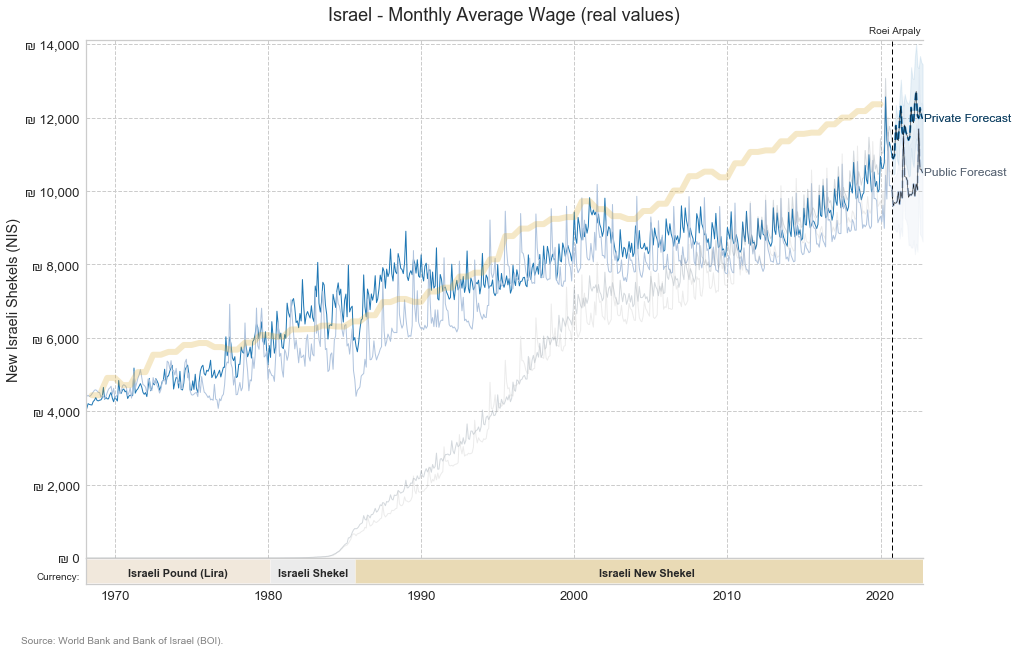

In [46]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0)
fig.suptitle('Roei Arpaly', x=0.8745, y=0.9, fontsize=10)

plot(df[df_columns][:])